In [1]:
%load_ext autoreload
%autoreload 2

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import math
import numpy as np
import seaborn as sns
import datetime
from time import time
from functools import reduce
from matplotlib import pyplot as plt
from soccerlearn.features import *
import matplotlib.patheffects as pe

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
init_notebook_mode(connected=True)
sns.set()

plotly_config = {'staticPlot': True}
SMALL_SIZE=10
MEDIUM_SIZE=SMALL_SIZE+5
BIGGER_SIZE=MEDIUM_SIZE+5

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('figure', dpi=100)

In [94]:
def expected_returns(prob_real, prob_bookmaker, prob_model, bet_func):
    odd_bookmaker = (1 / prob_bookmaker)
    expected_gains = odd_bookmaker * prob_model
    bet_model = bet_func(expected_gains)
    winning_case = prob_real * (odd_bookmaker * bet_model) - bet_model
    return winning_case

def generate_expected_returns(model_space, bookmaker_space):
    returns = []
    for diff_real_model in model_space:
        prob_model = min(max(prob_real + diff_real_model, 0), 1)
        for diff_real_bookmaker in bookmaker_space:
            prob_bookmaker = min(max(prob_real + diff_real_bookmaker, 0), 1)
            returns.append({
                'expected_return_expected_gains': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_expected_gains),
                'expected_return_flat': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_flat),
                'expected_return_proportional': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_proportional),
                'diff_real_bookmaker': diff_real_bookmaker,
                'prob_bookmaker': prob_bookmaker,        
                'prob_model': prob_model,
                'prob_real': prob_real,
                'diff_real_model': diff_real_model,
            })
    
    returns = pd.DataFrame(returns)
    return returns

def generate_random_expected_returns(n):
    returns = []
    for i in range(n):
        diff_real_model, diff_real_bookmaker = np.random.uniform(-0.2, 0.2, 2)
        prob_model = min(max(prob_real + diff_real_model, 0), 1)
        prob_bookmaker = min(max(prob_real + diff_real_bookmaker, 0), 1)
        returns.append({
            'expected_return_expected_gains': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_expected_gains),
            'expected_return_flat': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_flat),
            'expected_return_proportional': expected_returns(prob_real, prob_bookmaker, prob_model, bet_func_proportional),
            'diff_real_bookmaker': diff_real_bookmaker,
            'prob_bookmaker': prob_bookmaker,        
            'prob_model': prob_model,
            'prob_real': prob_real,
            'diff_real_model': diff_real_model,
        })
    
    returns = pd.DataFrame(returns)
    return returns

bet_func_expected_gains = lambda x: 1
bet_func_flat = lambda x: 1 if x >= 1 else 0
bet_func_proportional = lambda x: x if x >= 1 else 0

prob_real = 0.5
model_space = sorted(np.linspace(-0.2, 0.2, 50).tolist() + [0])
bookmaker_space = sorted(np.linspace(-0.2, 0.2, 50).tolist() + [0])
#model_space = np.random.uniform(-0.2, 0.2, 100) + [0]
#bookmaker_space = np.random.uniform(-0.2, 0.2, 100) + [0]

returns = generate_expected_returns(model_space, bookmaker_space)
returns.head()

,diff_real_bookmaker,diff_real_model,expected_return_expected_gains,expected_return_flat,expected_return_proportional,prob_bookmaker,prob_model,prob_real
0,-0.200000,-0.2,0.666667,0.666667,0.666667,0.300000,0.3,0.5
1,-0.191837,-0.2,0.622517,0.000000,0.000000,0.308163,0.3,0.5
2,-0.183673,-0.2,0.580645,0.000000,0.000000,0.316327,0.3,0.5
3,-0.175510,-0.2,0.540881,0.000000,0.000000,0.324490,0.3,0.5
4,-0.167347,-0.2,0.503067,0.000000,0.000000,0.332653,0.3,0.5


In [51]:
# Expected returns depending on bookmaker's miscalibration

Text(0.5, 1.0, "Expected returns vs bookmaker's miscalibration")

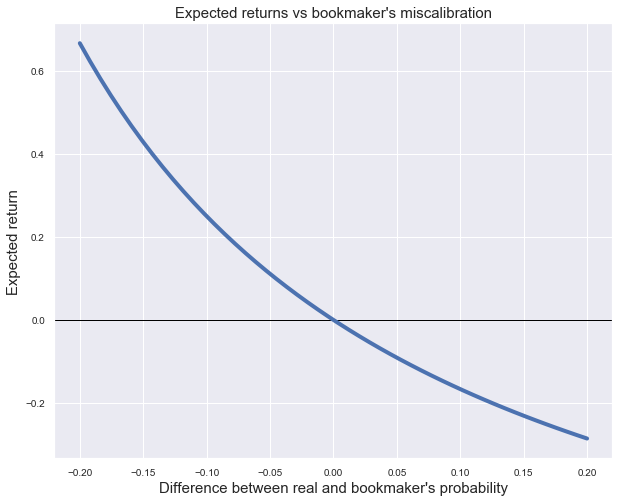

In [53]:
data_to_plot = returns.loc[returns['diff_real_model'] == 0].set_index('diff_real_bookmaker')
fig, ax = plt.subplots(figsize=(10, 8))
ax.axhline(0, color='black', lw=1)
ax.plot(data_to_plot['expected_return_expected_gains'], alpha=1, lw=4)
ax.set_xlabel("Difference between real and bookmaker's probability")
ax.set_ylabel('Expected return')
ax.set_title("Expected returns vs bookmaker's miscalibration")

In [9]:
# Expected returns depending on bookmaker's calibration with a flat betting strategy

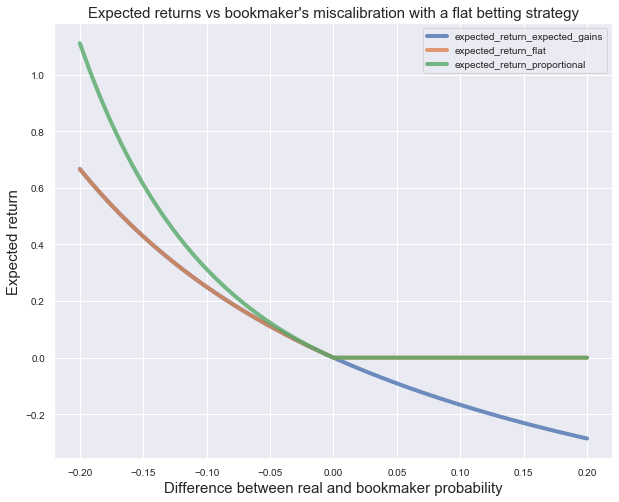

In [54]:
data_to_plot = returns.loc[returns['diff_real_model'] == 0].set_index('diff_real_bookmaker')
fig, ax = plt.subplots(figsize=(10, 8))
for col in ['expected_return_expected_gains', 'expected_return_flat', 'expected_return_proportional']:
    ax.plot(data_to_plot[col], alpha=0.8, label=col, lw=4)
    
ax.set_xlabel('Difference between real and bookmaker probability')
ax.set_ylabel('Expected return')
ax.set_title("Expected returns vs bookmaker's miscalibration with a flat betting strategy")
plt.legend()

In [104]:
model_space = sorted(np.random.uniform(-0.2, 0.2, 100) + [0])
bookmaker_space = sorted(np.random.uniform(-0.2, 0.2, 100) + [0])

returns = generate_random_expected_returns(50000)
print(returns.shape)
returns.head()

(50000, 8)


,diff_real_bookmaker,diff_real_model,expected_return_expected_gains,expected_return_flat,expected_return_proportional,prob_bookmaker,prob_model,prob_real
0,0.195638,0.005193,-0.281235,0.0,0.0,0.695638,0.505193,0.5
1,0.050443,-0.046780,-0.091640,0.0,0.0,0.550443,0.453220,0.5
2,0.046578,-0.087293,-0.085217,0.0,0.0,0.546578,0.412707,0.5
3,0.062960,-0.053328,-0.111838,0.0,0.0,0.562960,0.446672,0.5
4,-0.023040,-0.148515,0.048305,0.0,0.0,0.476960,0.351485,0.5


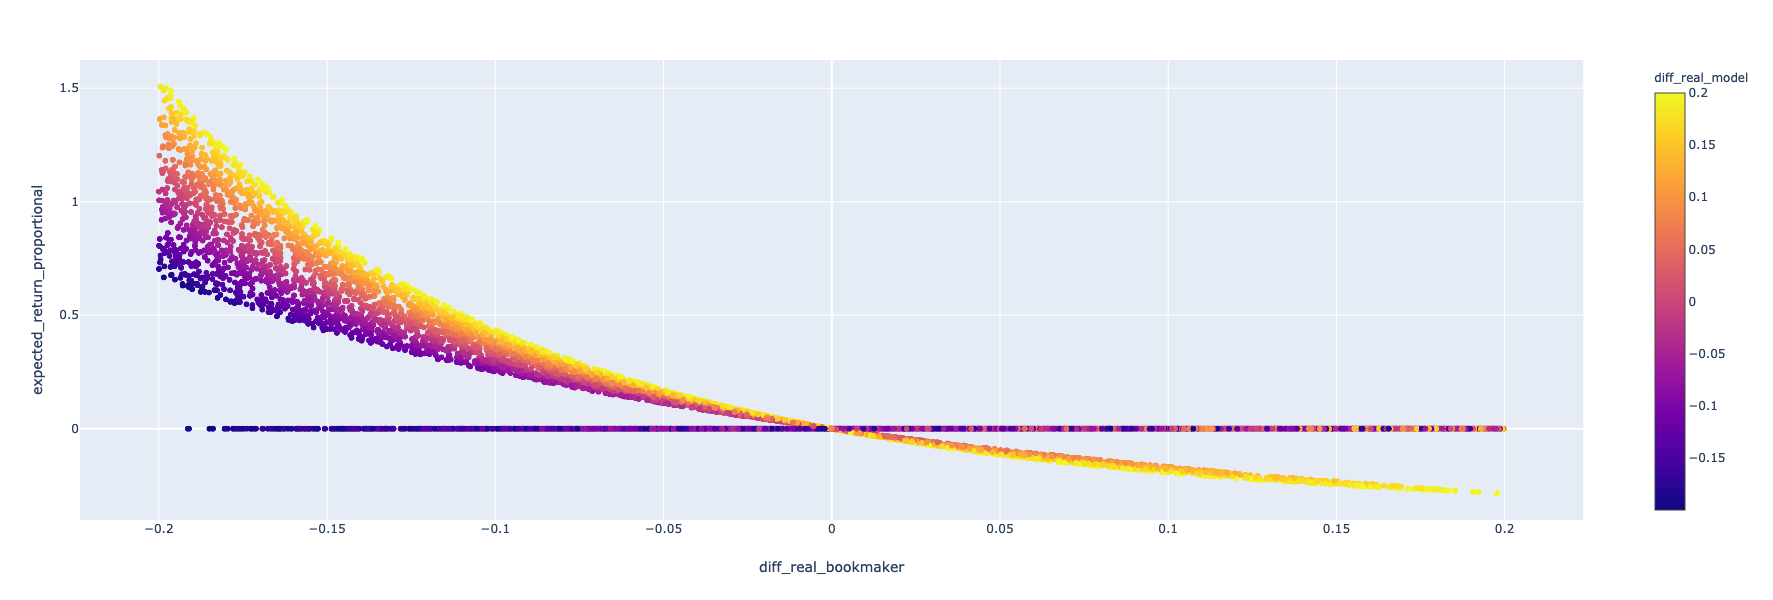

In [98]:
data_to_plot = returns.copy()
fig = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_proportional", color="diff_real_model")#, hover_data=['diff_real_model'])
fig.show(config=plotly_config)

In [58]:
#data_to_plot = returns.loc[returns['diff_real_bookmaker'] < 0]
#data_to_plot = returns.copy()
#fig = px.scatter(data_to_plot, x="diff_real_model", y="expected_return_proportional", color="diff_real_bookmaker")#, hover_data=['diff_real_model'])
#fig.show(config=plotly_config)

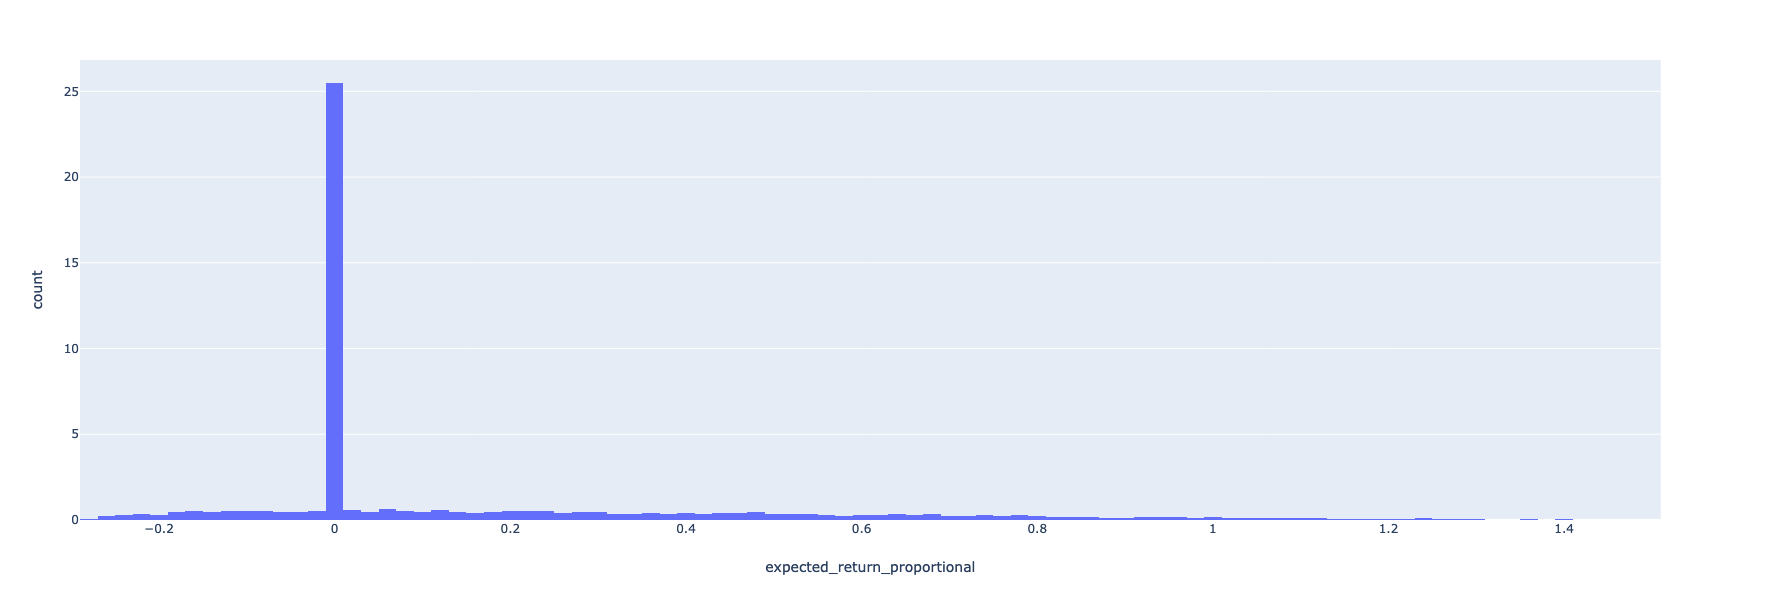

In [99]:
fig = px.histogram(data_to_plot, x='expected_return_proportional', histnorm='probability density')
fig.show(config=plotly_config)

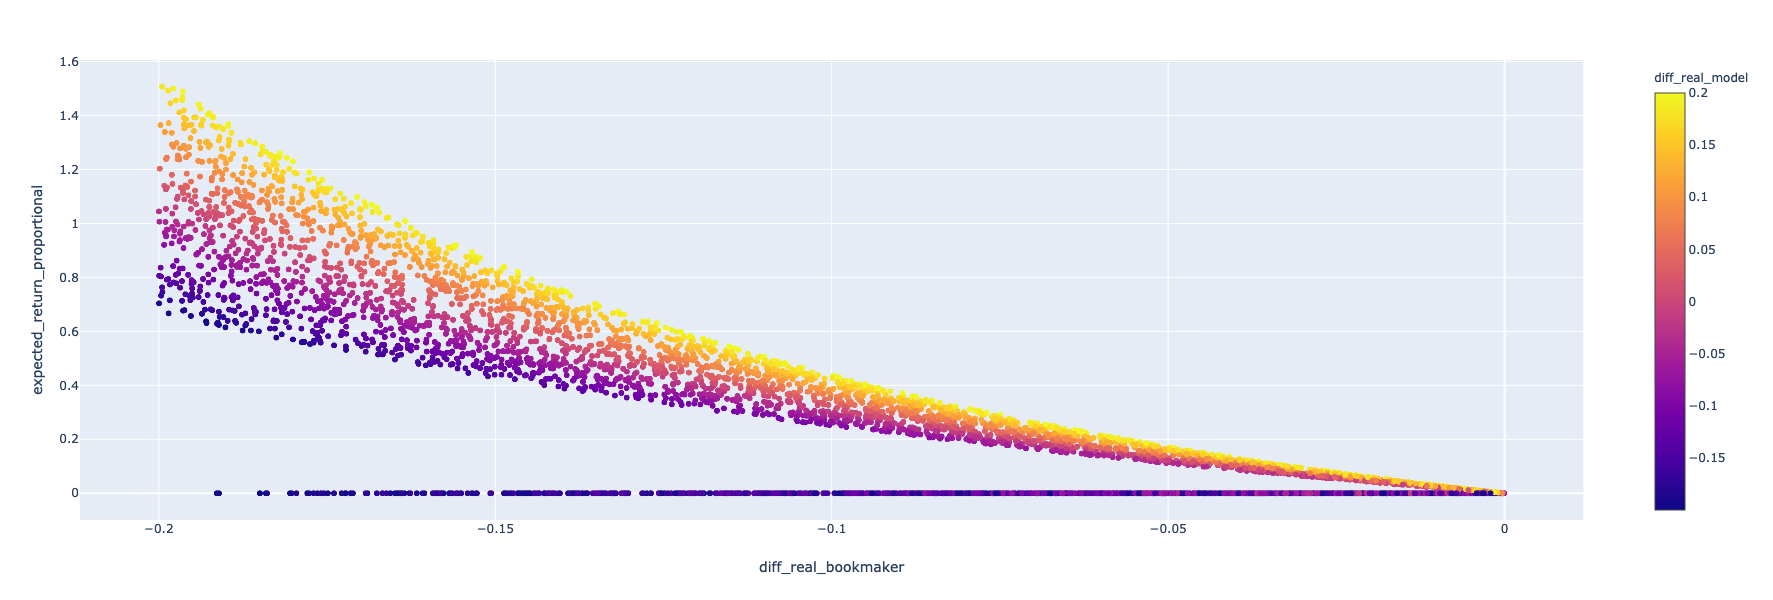

In [100]:
data_to_plot = returns.loc[returns['diff_real_bookmaker'] <= 0]
fig = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_proportional", color="diff_real_model")#, hover_data=['diff_real_model'])
fig.show(config=plotly_config)

In [101]:
#data_to_plot['diff_model_bookmaker'] = data_to_plot['diff_real_model'] - data_to_plot['diff_real_bookmaker']
#data_to_plot['diff_model_bookmaker'] = data_to_plot['prob_model'] - data_to_plot['prob_bookmaker']
#plt.scatter(data_to_plot['diff_model_bookmaker'], data_to_plot['expected_return_proportional'])

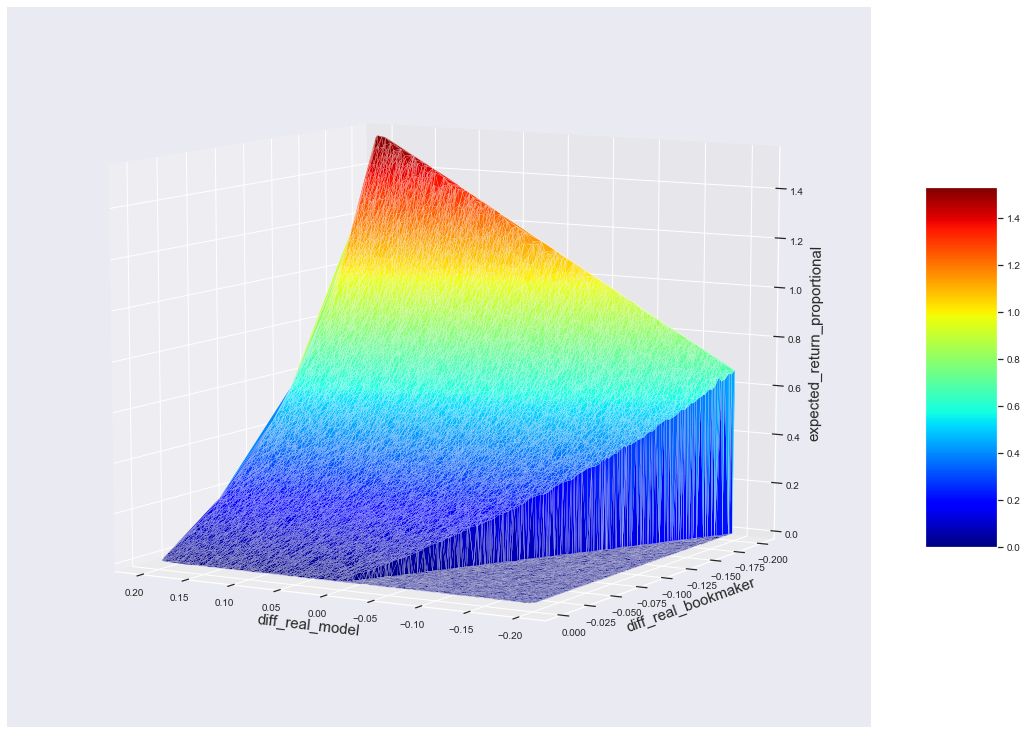

In [109]:
data_to_plot = returns.loc[returns['diff_real_bookmaker'] <= 0].copy()
_x = 'diff_real_model'
_y = 'diff_real_bookmaker'
_z = 'expected_return_proportional'

x = data_to_plot[_x]
y = data_to_plot[_y]
z = data_to_plot[_z]

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.set_facecolor('white')
#ax.set_facecolor('white') 
#ax.grid(False) 
#ax.w_xaxis.pane.fill = False
#ax.w_yaxis.pane.fill = False
#ax.w_zaxis.pane.fill = False
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')
ax.view_init(10, 120)
ax.set_xlabel(_x)
ax.set_ylabel(_y)
ax.set_zlabel(_z)
plt.show()

In [28]:
#fig = px.scatter(data_to_plot, x="diff_real_model", y="diff_real_bookmaker", color="expected_return_proportional")#, hover_data=['diff_real_model'])
#fig.show(config=plotly_config)

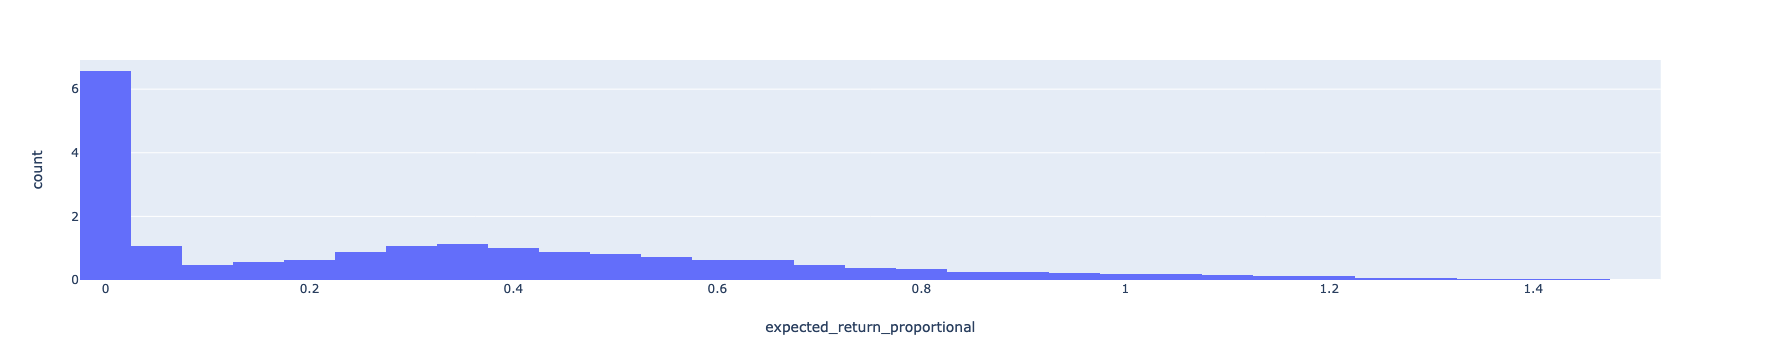

In [29]:
data_to_plot = returns.loc[returns['diff_real_bookmaker'] < 0]
fig = px.histogram(data_to_plot, x='expected_return_proportional', histnorm='probability density')
fig.show(config=plotly_config)

In [ ]:
data_to_plot = returns.loc[returns['diff_real_bookmaker'] < 0]

fig = px.histogram(data_to_plot, x='expected_return_proportional', histnorm='probability density')
fig.show(config=plotly_config)

In [ ]:
data_to_plot['expected_return_proportional'].hist()

In [ ]:
#data_to_plot = returns.copy()
#fig_scatter = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_proportional", color="diff_real_model")#, hover_data=['diff_real_model'])
#fig_hist = px.histogram(data_to_plot, x='expected_return_proportional', histnorm='probability density')
#trace_scatter = fig_scatter['data'][0]
#trace_hist = fig_hist['data'][0]
#
#fig = make_subplots(rows=1, cols=2)#, shared_xaxes=False)
#fig.add_trace(trace_hist, row=1, col=1)
#fig.add_trace(trace_scatter, row=1, col=2)
#fig.show(config=plotly_config)


In [ ]:
data_to_plot = returns.copy()
fig = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_flat", color="diff_real_model")
fig.show(config=plotly_config)

In [ ]:
fig = px.histogram(data_to_plot, x='expected_return_flat', histnorm='probability density')
fig.show(config=plotly_config)

In [ ]:
data_to_plot = returns.copy()
fig = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_proportional", color="diff_real_model")#, hover_data=['diff_real_model'])
fig.show(config=plotly_config)

In [ ]:
data_to_plot = returns.copy()
data_to_plot['expected_return_flat_jitter'] = data_to_plot['expected_return_flat'] + np.random.normal(0, 0.001, len(data_to_plot))
fig = px.scatter(data_to_plot, x="diff_real_bookmaker", y="expected_return_flat_jitter", color="diff_real_model")#, hover_data=['diff_real_model'])
fig.show(config=plotly_config)

In [ ]:
np.random.normal(0, 1, 10)